In [ ]:
import os
from pathlib import Path
from typing import List
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fixed_palette = {
    'gray': 'xkcd:gray',
    'green': 'xkcd:shamrock green',
    'red': 'red',
    'blue': 'xkcd:blue',
}
markertypes = ['X', 'D', 'o', 'P']
labels = ['GenGamma', 'Laplace', 'Gaussian', 'Student t']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=5) for m in markertypes]



def find_master_dfs(root_dir: str) -> List[str]:
    root_path = Path(root_dir)
    if not root_path.exists():
        raise FileNotFoundError(f"Directory not found: {root_dir}")

    master_df_paths = []
    for current_dir, _, files in os.walk(root_path):
        if 'master_df.csv' in files:
            master_df_path = Path(os.path.join(current_dir, 'master_df.csv'))
            master_df_paths.append(str(master_df_path.absolute()))
    return master_df_paths

relevant_cols = ['obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'dataset', 'transform', 'size', 'channel']

all_paths = find_master_dfs('..\case-studies')
all_master_dfs = []

for path in all_paths:
    dataset, transform, size, channel, _, _ = Path(path).parts[-6:]
    master_df = pd.read_csv(path)
    master_df = master_df.rename(columns={master_df.columns[0]: 'group'}).set_index('group')
    master_df['dataset'] = dataset
    master_df['transform'] = transform
    master_df['size'] = size
    master_df['channel'] = channel

    all_master_dfs.append(master_df[relevant_cols])
    
main_df = pd.concat(all_master_dfs)
main_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma,dataset,transform,size,channel
group,,,,,,,,,,,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078819e+08,356.081580,99.133301,600.444001,45000.0,0.16,1.0,0.010913,...,0.020005,4.487170e-16,3666.450000,0.017295,4.016650e-12,6.930700e-04,agriVision,fourier,batch0approx1e5,gray
5,1.529785e+08,8.631151e+07,3.112992e+08,813.590600,103.779987,2060.547926,117000.0,0.16,0.7,0.011256,...,0.018556,2.003500e-35,2556.890000,0.012588,1.560770e-16,1.445800e-08,agriVision,fourier,batch0approx1e5,gray
8,5.121678e+07,3.003023e+07,9.583304e+07,612.806126,92.325802,1727.800649,189000.0,0.18,1.5,0.008814,...,0.014049,7.833270e-33,1699.580000,0.008674,8.835880e-13,2.352200e-09,agriVision,fourier,batch0approx1e5,gray
11,3.090617e+07,1.261454e+07,1.278531e+08,5769.238912,83.057897,6259.838704,495000.0,0.19,1.7,0.008397,...,0.010974,3.310420e-52,1254.990000,0.005896,2.258660e-15,1.192500e-14,agriVision,fourier,batch0approx1e5,gray
14,1.055680e+07,5.359151e+06,3.458284e+07,2610.082854,75.710781,4860.044055,1134000.0,0.20,2.0,0.006294,...,0.008823,4.143350e-77,896.809000,0.005659,5.723740e-32,9.586600e-28,agriVision,fourier,batch0approx1e5,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,3.739722e+02,3.631603e+02,3.849922e+02,10.399796,7.744357,15.153512,1149538.0,0.20,-1.0,0.040247,...,0.071859,0.000000e+00,5.505590,0.075162,0.000000e+00,0.000000e+00,spaceNet,wavelet,approx1e5,red
6,9.055869e+01,8.797025e+01,9.337066e+01,11.086198,8.393261,15.483007,4251250.0,0.25,-0.9,0.020993,...,0.055948,0.000000e+00,3.051940,0.060007,0.000000e+00,0.000000e+00,spaceNet,wavelet,approx1e5,red
7,2.086429e+01,2.013236e+01,2.165660e+01,18.333370,11.867616,29.351609,17005000.0,0.28,-1.0,0.016885,...,0.058797,0.000000e+00,1.289940,0.062423,0.000000e+00,0.000000e+00,spaceNet,wavelet,approx1e5,red


<Axes: xlabel='group', ylabel='kstest_stat_best'>

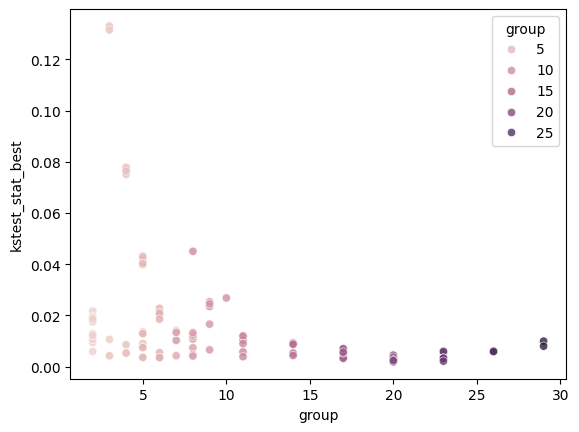

In [ ]:
#sns.scatterplot(data=main_df, x='best_r', y='best_eta', hue='transform')
#sns.scatterplot(data=main_df, x='group', y='kstest_stat_best', style='transform', hue='channel', palette = fixed_palette, alpha = 0.8)
sns.scatterplot(data=main_df, x='group', y='kstest_stat_best', hue='', alpha = 0.8)

In [ ]:
main_df.columns

Index(['obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'dataset',
       'transform', 'size', 'channel'],
      dtype='object')

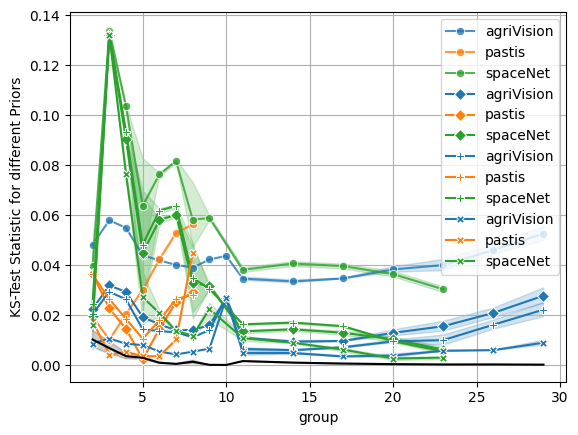

In [ ]:
hue = 'dataset'
fixed_palette=None
sns.lineplot(data=main_df, x='group', y='kstest_stat_gaussian', hue=hue, palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=main_df, x='group', y='kstest_stat_laplace', hue=hue, palette=fixed_palette, marker = 'D')
sns.lineplot(data=main_df, x='group', y='kstest_stat_t', hue=hue, palette=fixed_palette, marker = 'P')
sns.lineplot(data=main_df, x='group', y='kstest_stat_best', hue=hue, palette=fixed_palette, marker = 'X')
sns.lineplot(data=main_df, x='group', y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
#plt.legend(points, labels)
plt.grid(True)

In [ ]:
# First install required packages if you haven't already
# !pip install plotly ipywidgets

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Create the widgets
x_dropdown = widgets.Dropdown(
    options=list(main_df.columns),
    value='obs_var',
    description='X-axis:'
)

y_dropdown = widgets.Dropdown(
    options=list(main_df.columns),
    value='var_lower',
    description='Y-axis:'
)

color_dropdown = widgets.Dropdown(
    options=['None'] + list(main_df.columns),
    value='dataset',
    description='Color:'
)

marker_dropdown = widgets.Dropdown(
    options=['None'] + list(main_df.columns),
    value='transform',
    description='Marker:'
)

# Function to create and update the plot
def make_plot(x, y, color, marker):
    color_val = None if color == 'None' else color
    symbol_val = None if marker == 'None' else marker
    
    fig = px.scatter(main_df, 
                    x=x,
                    y=y,
                    color=color_val,
                    symbol=symbol_val,
                    height=600,
                    width=800)
    
    fig.show()

# Create and display the interactive widget
out = widgets.interactive_output(make_plot, 
                               {'x': x_dropdown,
                                'y': y_dropdown,
                                'color': color_dropdown,
                                'marker': marker_dropdown})

# Display controls and plot
controls = widgets.VBox([x_dropdown, y_dropdown, color_dropdown, marker_dropdown])
display(controls, out)

## spaceNet fourier

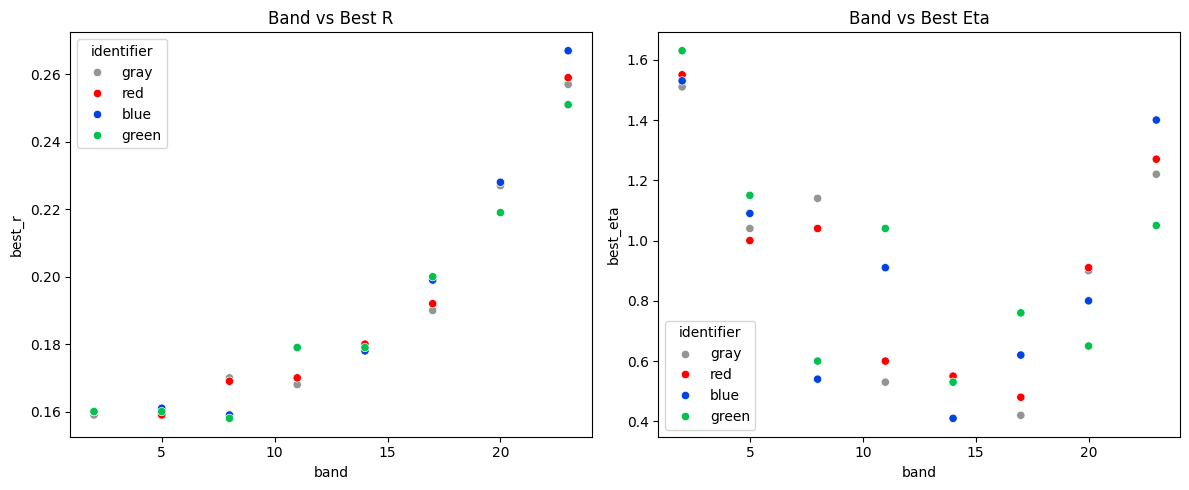

In [ ]:
summary_df = pd.read_csv('spaceNet_fourier_grayredbluegreen_summary_df.csv')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='best_r', hue='identifier', palette=fixed_palette, ax=axes[0])
axes[0].set_title('Band vs Best R')
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='best_eta', hue='identifier', palette=fixed_palette, ax=axes[1])
axes[1].set_title('Band vs Best Eta')
plt.tight_layout()
plt.show()

<Axes: xlabel='band', ylabel='kstest_stat_best'>

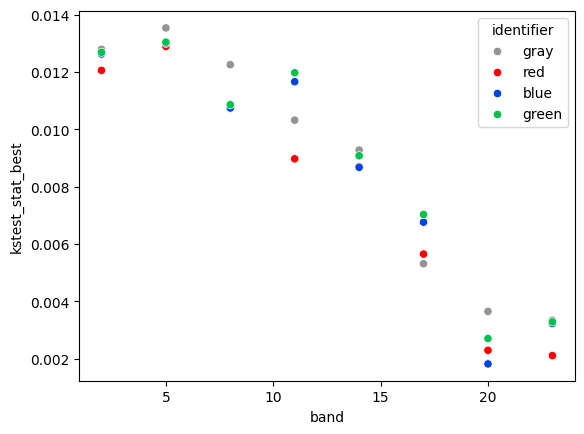

In [ ]:
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_best', hue='identifier', palette=fixed_palette)

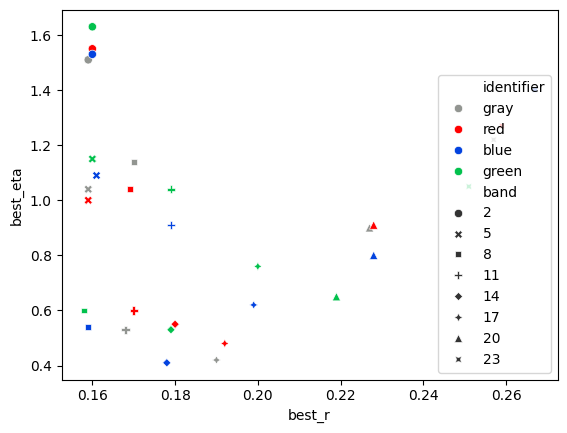

In [ ]:
sns.scatterplot(data=summary_df, x='best_r', y='best_eta', hue='identifier', style='band', palette=fixed_palette)
plt.legend(loc = 'lower right')

Text(0, 0.5, 'Parameters (Gaussian / Laplace)')

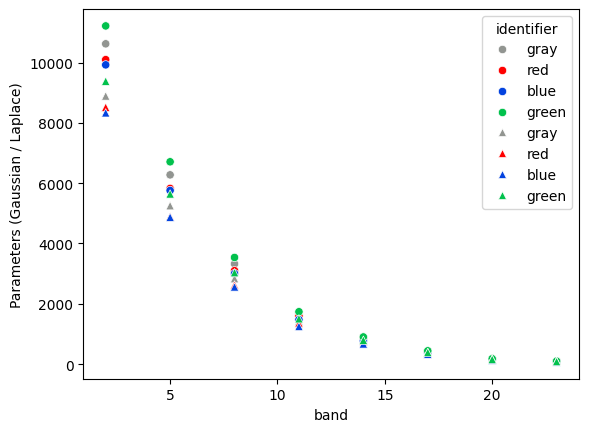

In [ ]:
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='param_gaussian', hue='identifier', palette=fixed_palette, marker = 'o')
sns.scatterplot(data=summary_df, x=summary_df.columns[0], y='param_laplace', hue='identifier', palette=fixed_palette, marker = '^')
plt.ylabel("Parameters (Gaussian / Laplace)")

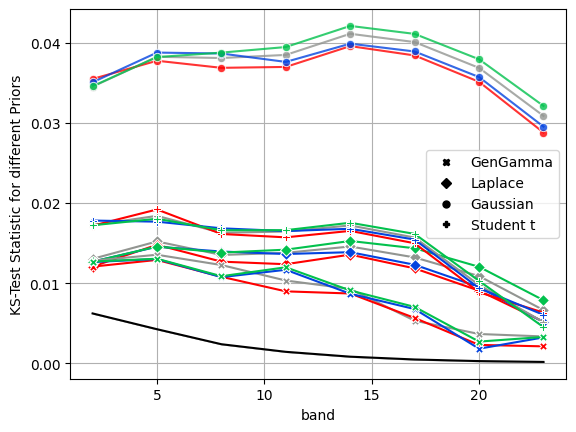

In [ ]:
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_gaussian', hue='identifier', palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_laplace', hue='identifier', palette=fixed_palette, marker = 'D')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_t', hue='identifier', palette=fixed_palette, marker = 'P')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_best', hue='identifier', palette=fixed_palette, marker = 'X')
sns.lineplot(data=summary_df, x=summary_df.columns[0], y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)

In [ ]:
summary_df.columns

Index(['band', 'obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'identifier',
       'size', 'dataset_name', 'transform', 'channel'],
      dtype='object')

## spaceNet Wavelet

In [ ]:
summary_df = pd.read_csv('spaceNet_wavelet_grayredbluegreen_summary_df.csv')
summary_df['ksstat_discrete'] = pd.cut(summary_df['kstest_stat_best'], bins=5)

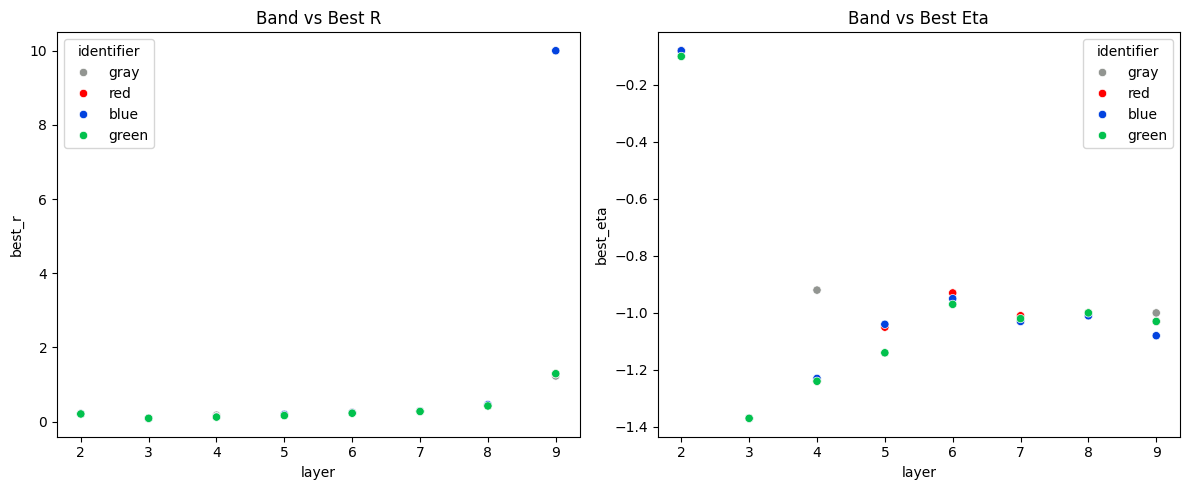

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.scatterplot(data=summary_df, x='layer', y='best_r', hue='identifier', palette=fixed_palette, ax=axes[0])
axes[0].set_title('Band vs Best R')
sns.scatterplot(data=summary_df, x='layer', y='best_eta', hue='identifier', palette=fixed_palette, ax=axes[1])
axes[1].set_title('Band vs Best Eta')
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=summary_df, x='layer', y='kstest_stat_best', hue='identifier', palette=fixed_palette)

ValueError: Could not interpret value `layer` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='best_r', ylabel='best_eta'>

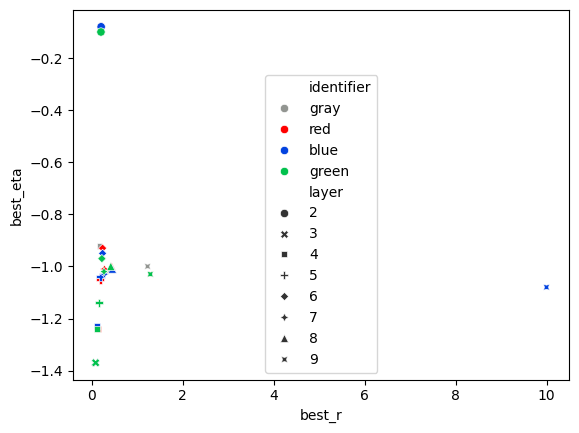

In [ ]:
sns.scatterplot(data=summary_df, x='best_r', y='best_eta', hue='identifier', style='layer', palette=fixed_palette)

In [ ]:
summary_df.columns

Index(['layer', 'obs_var', 'var_lower', 'var_upper', 'obs_kurt', 'kurt_lower',
       'kurt_upper', 'total_samples', 'initial_r', 'initial_eta',
       'kstest_stat_initial', 'kstest_stat_cutoff_0.05', 'kstest_stat_eta0',
       'best_r_eta0', 'best_r', 'best_eta', 'kstest_stat_best', 'iter1_r',
       'iter1_eta', 'kstest_stat_iter1', 'n_pval_0.05', 'param_gaussian',
       'kstest_stat_gaussian', 'kstest_pval_gaussian', 'param_laplace',
       'kstest_stat_laplace', 'kstest_pval_laplace', 'param_t',
       'kstest_stat_t', 'kstest_pval_t', 'kstest_pval_gengamma', 'identifier',
       'size', 'dataset_name', 'transform', 'channel', 'ksstat_discrete'],
      dtype='object')

<Axes: xlabel='layer', ylabel='param_gaussian'>

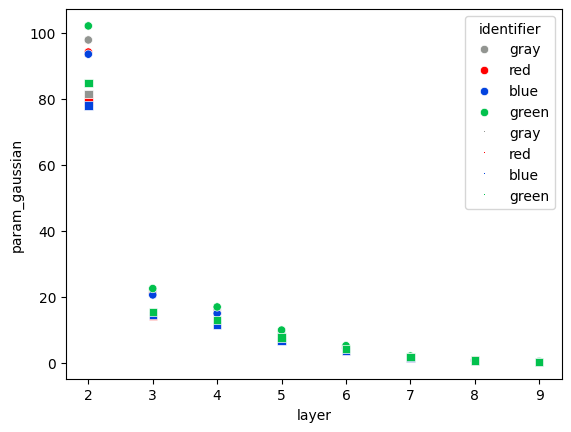

In [ ]:
sns.scatterplot(data=summary_df, x='layer', y='param_gaussian', hue='identifier', palette=fixed_palette, marker = 'o')
sns.scatterplot(data=summary_df, x='layer', y='param_laplace', hue='identifier', palette=fixed_palette, marker = ',')

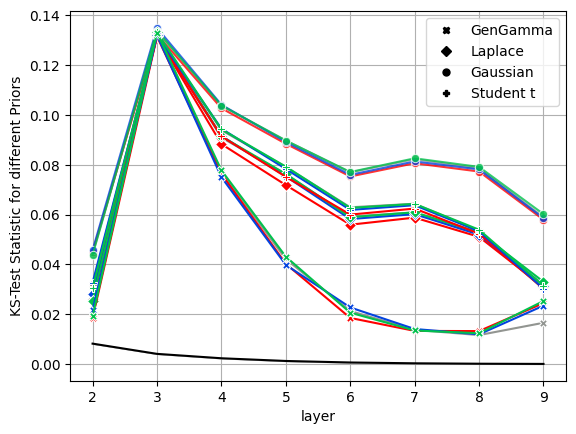

In [ ]:
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_gaussian', hue='identifier', palette=fixed_palette, marker = 'o', alpha=0.8)
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_laplace', hue='identifier', palette=fixed_palette, marker = 'D')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_t', hue='identifier', palette=fixed_palette, marker = 'P')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_best', hue='identifier', palette=fixed_palette, marker = 'X')
sns.lineplot(data=summary_df, x='layer', y='kstest_stat_cutoff_0.05', c = 'black')
plt.ylabel("KS-Test Statistic for different Priors")
plt.legend(points, labels)
plt.grid(True)

In [ ]:
summary_df.filter(regex = 'param.*|identifier')

,param_gaussian,param_laplace,param_t,identifier
0,97.783800,81.396700,68.279900,gray
1,21.694100,14.961000,12.082400,gray
2,16.048900,12.441900,10.038900,gray
3,9.329520,7.243720,5.830180,gray
4,4.952390,3.968450,3.208150,gray
5,2.014320,1.660870,1.319320,gray
6,0.853965,0.739293,0.580553,gray
7,0.433595,0.381958,0.304260,gray
8,94.125800,78.991400,65.979900,red
9,20.946400,14.361200,11.459600,red
